In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [46]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'price')

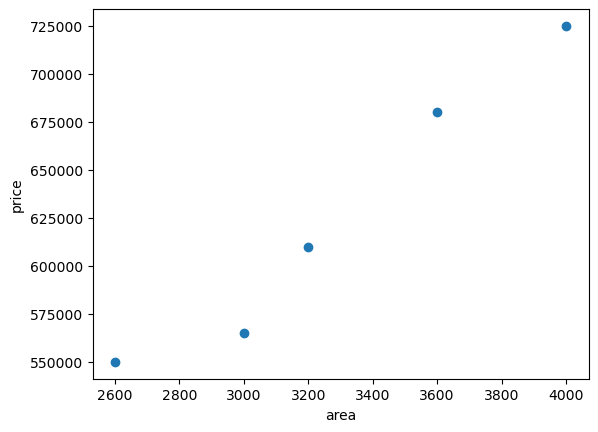

In [47]:
plt.scatter(df['area'], df['price'])
plt.xlabel('area')
plt.ylabel('price')

In [48]:
reg = linear_model.LinearRegression()

In [49]:
reg.fit(df[['area']], df['price'])

LinearRegression()

In [50]:
reg.coef_, reg.intercept_, reg.predict([[3300]])

C:\Users\wayla\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(array([135.78767123]), 180616.43835616432, array([628715.75342466]))

In [77]:
def prediction(df, coef, intercept):
   return coef[0] * np.arange(min(df[df.columns[0]]), max(df[df.columns[0]])) + intercept

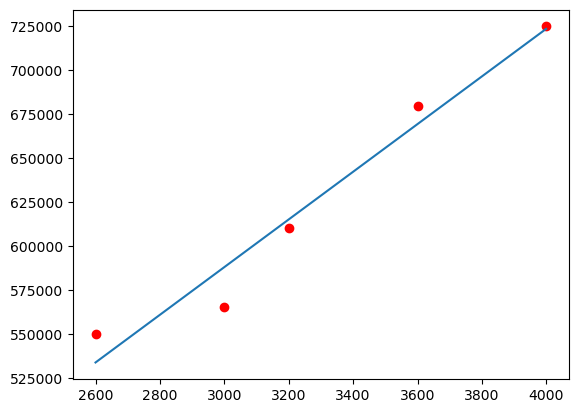

In [78]:
plt.scatter(df['area'], df['price'], color='red')
plt.plot(np.arange(min(df['area']), max(df['area'])), prediction(df, reg.coef_, reg.intercept_))
plt.show()

In [79]:
df2 = pd.read_csv('canada_per_capita_income.csv')
df2

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [80]:
reg2 = linear_model.LinearRegression()

In [81]:
reg2.fit(df2[['year']], df2['per capita income (US$)'])

LinearRegression()

In [82]:
reg2.predict([[2020]])

C:\Users\wayla\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [83]:
np.shape(prediction(df2, reg2.coef_, reg2.intercept_))
np.shape(np.arange(min(df[df.columns[0]]), max(df[df.columns[0]])))

(1400,)

In [98]:
df2_predict = pd.DataFrame()
df2_predict['Predicted_Years'] = np.arange(2016, 2021)
df2_predict['per capita income (US$)'] = reg2.predict(np.array(df2_predict['Predicted_Years']).reshape(-1, 1))
df2_predict

C:\Users\wayla\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Predicted_Years,per capita income (US$)
0,2016,37974.833794
1,2017,38803.298869
2,2018,39631.763944
3,2019,40460.229019
4,2020,41288.694094


C:\Users\wayla\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


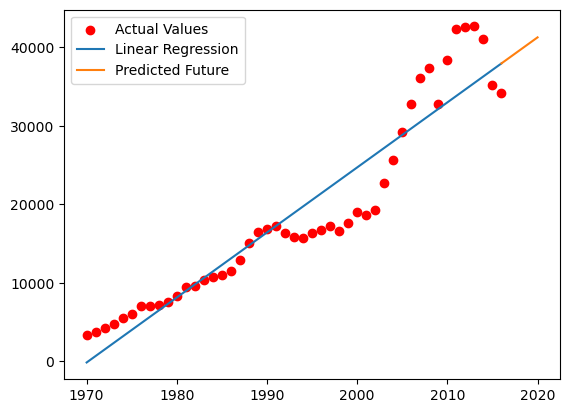

In [105]:
reg_vals = reg2.predict(np.array(df2['year']).reshape(-1, 1))
plt.scatter(df2['year'], df2['per capita income (US$)'], color='red', label='Actual Values')
plt.plot(df2['year'], reg_vals, label='Linear Regression')
plt.plot(df2_predict['Predicted_Years'], df2_predict['per capita income (US$)'], label='Predicted Future')
plt.legend(loc="upper left")
plt.show()